
### Leerdoelen
- Je leert wat unsupervised learning inhoud
- Je leert werken met K-means clustering in Python
- Je leert de uitkomst van K-means clustering interpreteren
- Je leert je conslusies uit het Data Understanding te verbinden aan de uitkomst van je K-means analyse
- Je leert het aantal clusters van een K-means te tunen

### Achtergrondinformatie:
- Google naar:
    - `python sklearn kmeans`
    - `seaborn pairplot`
    - `pandas crosstab`
    - `k-means elbow method`
- Datacamp course `Clustering for dataset exploration` 

### Opdracht 
- Vul het onderstaande notebook aan op de gevraagde plekken. 

# Business Understanding
Dieren en planten worden door wetenschappers ingedeeld in verschillende categorien. Dit gebeurt op hoog niveau (neushoorn vs ringstaatmaki) en op detail niveau (zwarte vs witte neushoorn). Een dergelijk indeling wordt ook wel een taxonomie genoemd. Vaak wordt een dergelijke taxonomie gebaseerd op handmatig onderzoek door biologen. In deze analyse gaan we een dergelijke taxonomie toetsen voor een drietal soorten iris: wordt de indeling in verschillende soorten ondersteunt door de data?

# Data Understanding
De iris data is ons aangeleverd in een `csv` bestand:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

#handige jupyter notebook magic
%config IPCompleter.greedy = True  
%matplotlib inline
sns.set(style="ticks")

iris = pd.read_csv('Data/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


De dataset bestaat uit 5 variabelen:

- `Sepal.Length`, de lengte van het kelkblad
- `Sepal.Width`, de breedte van het kelkblad
- `Petal.Length`, de lengte van het bloemblaadje
- `Petal.Width`, de breedte van het bloemblaadje
- `Species`, het soort iris waar de bloem toe behoort

De dataset bestaat uit 150 observaties, 50 per iris-soort, met de volgende karateristieken:

In [4]:
#iris.groupby('Species').agg(['mean', 'std'])
# We hebben natuurlijk de describe() al gehad. 
# Maar hoe doe je dat nu per iris soort
iris.groupby('Species').describe()

Sepal.Length                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal.Width         ... Petal.Length      Petal.Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Hieruit is al duidelijk dat de bloemen veel verschillen onderling hebben, maar dat de verschillen sterker zijn tussen `setosa` en de andere soorten iris. 

Om een verdere indruk te krijgen van de verdeling van de data maken we een scatterplotmatrix:

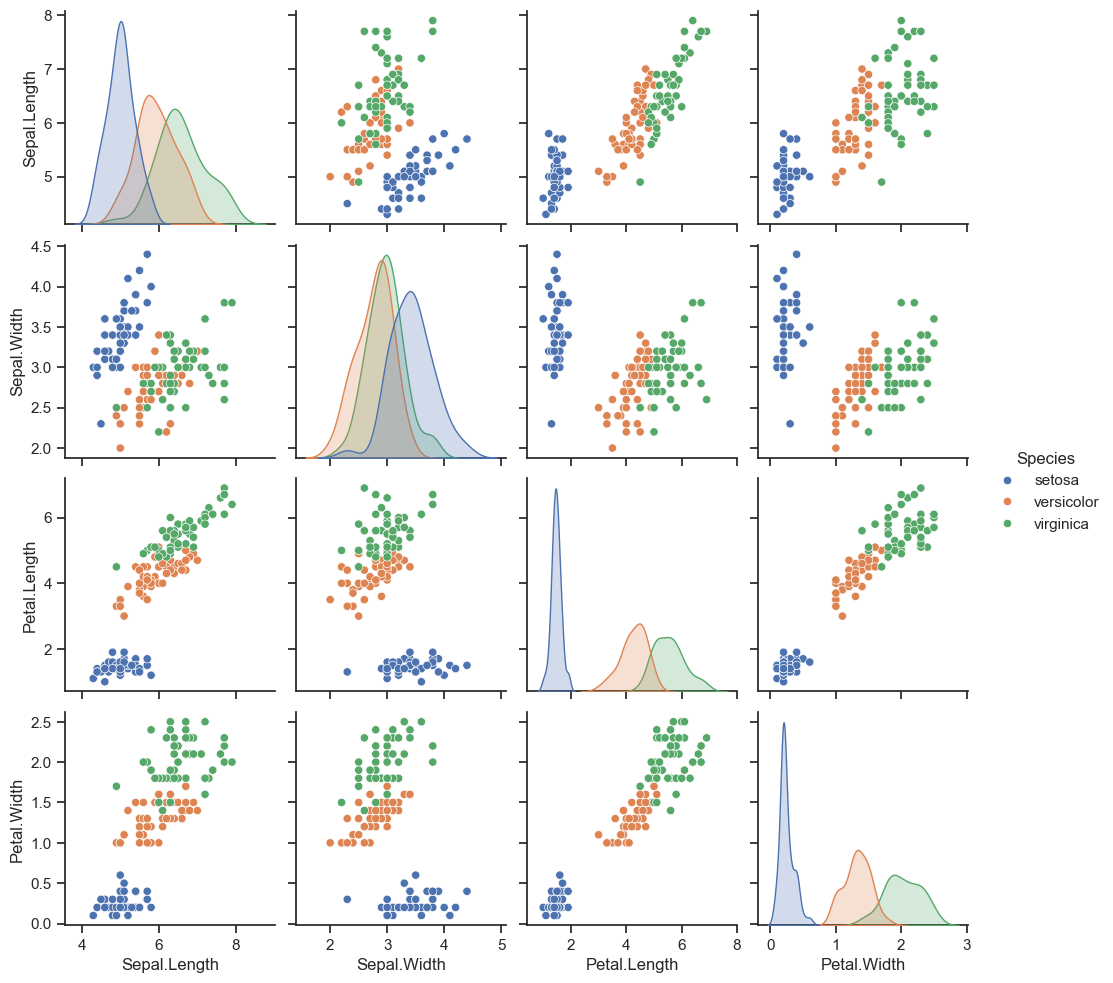

In [5]:
sns.pairplot(iris, hue="Species")

De kleur laat hier zien tot welke soort iris een bepaald punt hoort. We trekken de volgende conclusies uit dit figuur:

- Als je kijkt naar de individuele histogrammen van de losse variabelen zijn de verschillende bloemen eigenlijk alleen op basis van hun bloemblaadjes te scheiden (lijngrafiekje petal). 
- Als je twee variabelen samen neemt wordt deze onderscheidbaarheid sterker dan als je dit puur doet op basis van het gemiddelde en standaarddeviatie van de individuele variabelen.
- De setosa iris-soort is goed te scheiden van de andere twee soorten iris. De versicolor en de verginica vertonen veel overlap met elkaar, en zijn lastiger van elkaar te scheiden. 

# Data Preparation
Niks te doen....

# Modeling

## Eerste K-means model

Tot nu toe hebben we naar een aantal figuren gekeken in een poging om de verschillende soorten iris uit elkaar te kunnen halen. Nu gaan we een K-means unsupervised learning algoritme gebruiken om dit onderscheid te proberen te maken met een model:

In [8]:
kmeans = KMeans(n_clusters=3)
iris_kmeans = kmeans.fit(iris.drop(columns = ['Species'])) # Drop Species as the kmeans cannot deal with text 

Na het fitten van het kmeans algoritme willen we graag ook zien hoe goed het algoritme het doet. Hiervoor moeten we  een mapping maken tussen de resultaten van het algoritme (1,2,3,etc) en de echte waardes in de dataset (setosa, versicolor, etc). Allereerst printen we de door KMeans gevonden labels.

In [9]:
iris_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Nu hebben we de gemeten waarde, en de waarde die het algoritme er aan toe kent: predicted en observed. Deze twee kunnen we tegen elkaar uitzetten in een kruistabel (crosstab) of iets geavanceerder in een z.g.h. confusion matrix:

In [10]:
pd.crosstab(iris['Species'], iris_kmeans.labels_) 

col_0,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


Hieruit blijkt dat de `setosa` altijd goed wordt ingedeeld, de `versicolor` maar tweemaal fout, en de `virginica` veel vaker fout wordt ingedeeld (14 maal). Dit is in onvereenstemming met de scatterplot matrix, hier ligt `setosa` vaak ver weg van de andere twee. Wel valt op dat de `versicolor` het in K-means nog vrij goed doet in verhouding tot het beeld wat we kregen in de Data Understanding. Blijkbaar kan het multivariate karakter van K-means het onderscheidend vermogen voor `versicolor` nog opkrikken. 

## Tunen van de hoeveelheid clusters
Het aantal clusters voor K-means hebben we ingesteld op 3. Dit is voornamelijk omdat we al van tevoren weten dat er drie soorten bloemen zijn. In de praktijk is het vaak veel minder duidelijk hoeveel clusters aanwezig zijn, en is het kiezen (tunen) van het aantal clusters onderdeel van het analyse proces. Een manier om dit te doen is via de zogenaamde [Elbow-methode](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). 

Voer de K-means uit voor 1 tot en met 6 clusters en kijkt naar hoe goed het onderscheid is tussen de clusters (inertia):

In [11]:
#eerst 1 keer de inertia uitrekeken
#kmeans = KMeans(n_clusters=2)
#inertia_vs_no_clusters=kmeans.fit(iris.drop(columns = ['Species', 'kmeans_Species'])).inertia_
#dan uitbouwen naar lusje

cluster_options = [1,2,3,4,5,6]
inertia_vs_no_clusters = []
for no_clusters in cluster_options:
    kmeans = KMeans(n_clusters=no_clusters)
    inertia_vs_no_clusters.append(kmeans.fit(iris.drop(columns = ['Species'])).inertia_)
    
inertia_vs_no_clusters

# Bespreken resultaten: hoe meer clusters hoe minder variantie. 
# Laagste inertia bij net zo veel clusters als metingen
# waar zit nu het optimum? => in de elbow

[681.3706000000001,
 152.34795176035792,
 78.85144142614602,
 57.38387326549491,
 46.692699999999995,
 42.00311739130434]

In [19]:
# More advanced alternative

def get_inertia(no_clusters):
    kmeans = KMeans(n_clusters=no_clusters)
    return kmeans.fit(iris.drop(columns = ['Species', 'kmeans_Species'])).inertia_

inertia_vs_no_clusters = [get_inertia(no_clusters) for no_clusters in cluster_options]

KeyError: "['kmeans_Species'] not found in axis"

Het volgende plot laat het aantal clusters versus de inertia zien:

In [15]:
inertia_results = pd.DataFrame({"no_clusters": cluster_options, "inertia":inertia_vs_no_clusters})
inertia_results

,no_clusters,inertia
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.383873
4,5,46.692700
5,6,42.003117


<Axes: xlabel='no_clusters'>

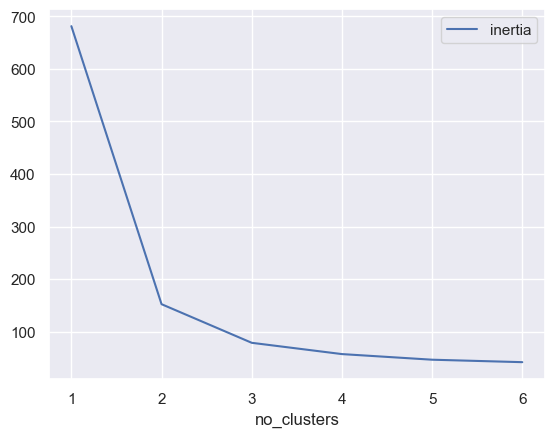

In [16]:
inertia_results.plot(x='no_clusters', y="inertia")

Als we de Elbow methode gebuiken zien we dat het inflexiepunt tussen de twee en drie clusters ligt. Dit is in lijn met de eerdere resultaten in de Data Understanding: `Setosa` is goed te onderscheiden van de andere twee soorten Iris, maar deze laatste twee zijn moeilijker van elkaar te scheiden. 

# Evaluation
Het is duidelijk dat setosa op de gemeten variabelen een compleet ander soort iris is dan de andere twee opties. Deze andere twee lijken veel meer op elkaar, en zijn lastiger uit elkaar te trekken. Dit maakt het vanuit deze analyse lastiger om hard te maken dat deze soorten ook echt een apart soort iris zijn. Wel moeten we ons bedenken dat er nog veel meer redenen kunnen zijn waarom deze twee soorten iris verschillend zijn die niks met onze specifieke dataset te maken hebben. 